In [1]:
#Modeling - Initial time based modeling
#Goal of this notebook is to read in a training file, select out a sport from the activities,
#Plot it and predict on what the performance at a later date will be.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [3]:
#Let's read in a single csv first:
race_df = pd.read_csv('./data/races/athlete_3/athlete_3_race_4_3_mo_Running_extra_cols.csv', index_col='date')

In [4]:
race_df.head()

,Unnamed: 0,index,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,...,max_resp,athlete_id,filetype,is_race,ft_per_mile,intensity,spd_ft_s,spd_mph,GAP_ft_s,GAP_by_intensity
date,,,,,,,,,,,,,,,,,,,,,
2019-04-25,0,0,Running,False,Fresno Running,4.40,496,00:35:02,138,155,...,0,3,garmin,0,8.181818,0.745946,11.069182,7.547170,11.069196,14.839139
2019-04-27,1,4,Running,False,Boulder Running,2.59,320,00:20:02,147,165,...,0,3,garmin,0,41.698842,0.794595,11.379310,7.758621,11.379665,14.321347
2019-04-28,2,5,Running,False,Denver Running,12.64,"1,453",01:38:16,149,171,...,0,3,garmin,0,45.965190,0.805405,11.306210,7.708779,11.306638,14.038443
2019-04-30,3,11,Running,False,Denver Running,6.53,736,00:50:03,142,154,...,0,3,garmin,0,18.070444,0.767568,11.478261,7.826087,11.478328,14.954160
2019-05-02,4,15,Running,False,Denver Running,6.17,644,00:50:18,136,159,...,0,3,garmin,0,47.811994,0.735135,10.797546,7.361963,10.797989,14.688441


In [5]:
race_df[race_df['is_race'] == 1]

,Unnamed: 0,index,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,...,max_resp,athlete_id,filetype,is_race,ft_per_mile,intensity,spd_ft_s,spd_mph,GAP_ft_s,GAP_by_intensity
date,,,,,,,,,,,,,,,,,,,,,


In [6]:
#Great, I have a 3 month train set. Race is a half marathon at 1:27:20 time.

In [7]:
race_df['elev_gain'] = race_df['elev_gain'].str.replace(',', '').astype(float)


AttributeError: Can only use .str accessor with string values!

In [8]:
race_df['elev_loss'] = race_df['elev_loss'].str.replace(',', '').astype(float)


In [9]:
race_df['calories'] = race_df['calories'].str.replace(',', '').astype(float)

In [10]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 2019-04-25 to 2019-07-25
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                51 non-null     int64  
 1   index                     51 non-null     int64  
 2   activity_type             51 non-null     object 
 3   favorite                  51 non-null     bool   
 4   title                     51 non-null     object 
 5   distance                  51 non-null     float64
 6   calories                  51 non-null     float64
 7   time                      51 non-null     object 
 8   avg_hr                    51 non-null     int64  
 9   max_hr                    51 non-null     int64  
 10  aerobic_te                51 non-null     float64
 11  avg_run_cadence           51 non-null     int64  
 12  max_run_cadence           51 non-null     int64  
 13  avg_pace                  51 non-null     object 
 14  

In [11]:
import pmdarima as pmd

In [12]:
from pmdarima.utils import tsdisplay

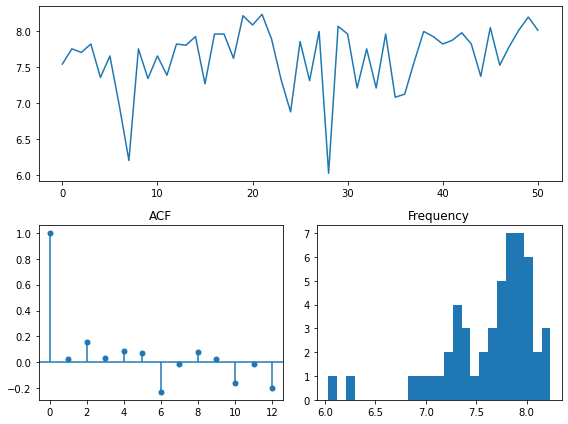

In [13]:
tsdisplay(race_df['spd_mph'], lag_max=12)

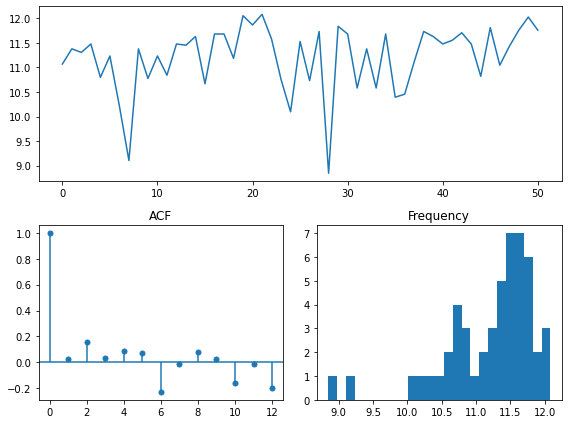

In [14]:
tsdisplay(race_df['GAP_ft_s'], lag_max=12)

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX as sm

In [16]:
X = race_df[['distance', 'avg_hr','elev_gain']] #, 'avg_stride_length', 'avg_ground_contact_time']]

In [17]:
len(X)

51

In [18]:
y = race_df['spd_ft_s']

In [19]:
model = pmd.auto_arima(y, X=X, m=14, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[14] intercept   : AIC=85.759, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[14] intercept   : AIC=71.767, Time=0.27 sec
 ARIMA(1,0,0)(1,0,0)[14] intercept   : AIC=79.456, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[14] intercept   : AIC=79.709, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[14]             : AIC=75.970, Time=0.15 sec
 ARIMA(0,0,0)(1,0,0)[14] intercept   : AIC=79.129, Time=0.28 sec
 ARIMA(0,0,0)(0,0,1)[14] intercept   : AIC=78.990, Time=0.72 sec
 ARIMA(0,0,0)(1,0,1)[14] intercept   : AIC=82.642, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[14] intercept   : AIC=78.338, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[14] intercept   : AIC=78.724, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[14] intercept   : AIC=79.231, Time=0.43 sec

Best model:  ARIMA(0,0,0)(0,0,0)[14] intercept
Total fit time: 4.305 seconds


In [20]:
preds = model.predict(1, [[12.96, 166, 154]])#, 1.30, 240]])
preds

/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([12.85030145])

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:                        SARIMAX   Log Likelihood                 -30.884
Date:                Wed, 03 Mar 2021   AIC                             71.767
Time:                        19:42:01   BIC                             81.427
Sample:                             0   HQIC                            75.458
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.1900      0.910      3.504      0.000       1.406       4.975
distance       0.0491      0.032      1.532      0.126      -0.014       0.112
avg_hr         0.0548      0.007      8.144      0.000       0.042       0.068
elev_gain     -0.0005      0.001     -0.766      0.444      -0.002       0.001
sigma2         0.1951      0.048      4.053      0.000       0.101       0.290
===================================================================================
Ljung-Box (Q):                       50.26   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.13   Prob(JB):                         0.51
Heteroskedasticity (H):               0.46   Skew:                            -0.34
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#This is actually very close to my actual race pace of 6:45 miles, which is 13.03 ft/s.

In [25]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_0/athlete_0_race_0_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>


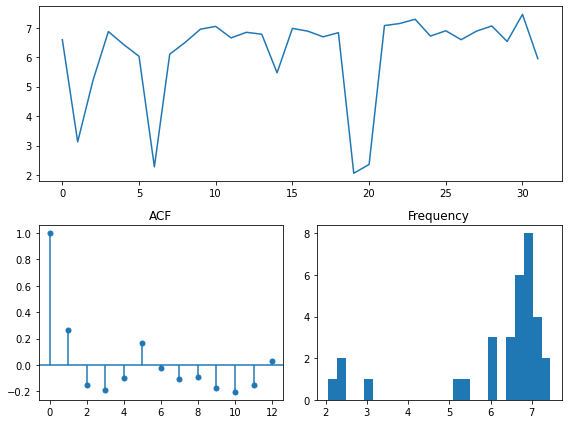

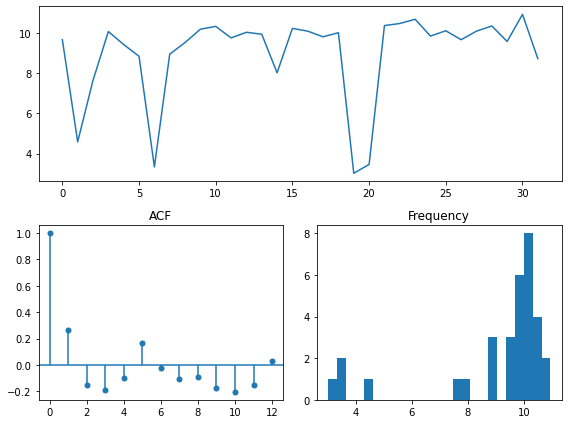

In [26]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [27]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=127.774, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=124.846, Time=0.18 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=121.866, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=122.661, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=125.882, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=120.990, Time=0.18 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=121.810, Time=0.41 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=124.602, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=123.007, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=122.636, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=124.803, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=125.108, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[7]             : AIC=121.364, Time=0.18 sec

Best model:  ARIMA(1,0,0)(0,0,0)[7] intercept
Total fit time: 3.783 seconds


/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([25.24016419])

In [28]:
#Does not work so well for a 50 mile race with not as much similar data.

### Athlete 1

In [29]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_1/athlete_1_race_0_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


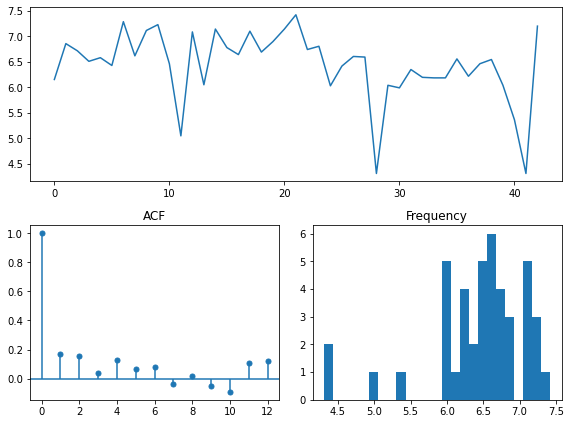

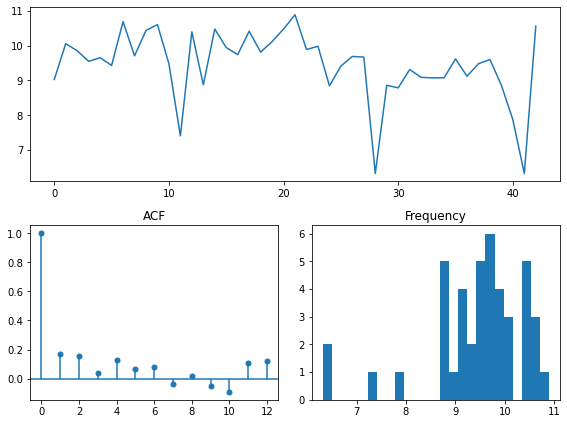

In [30]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [31]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=79.930, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=74.123, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=77.653, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=77.770, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=72.127, Time=0.17 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=75.679, Time=0.23 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=76.895, Time=0.20 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=78.804, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=76.007, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=76.320, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=78.075, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7]          
Total fit time: 2.792 seconds


/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([12.22888503])

In [32]:
race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'spd_ft_s']]

,distance,avg_hr,elev_gain,spd_ft_s
date,,,,
2017-01-15,26.48,147,210,10.56


### Race 1

In [33]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_1/athlete_1_race_1_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>


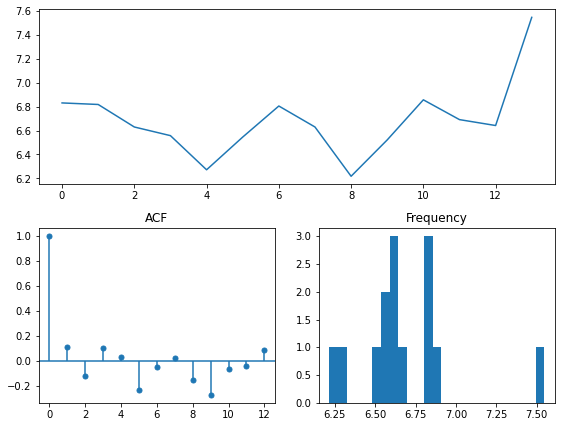

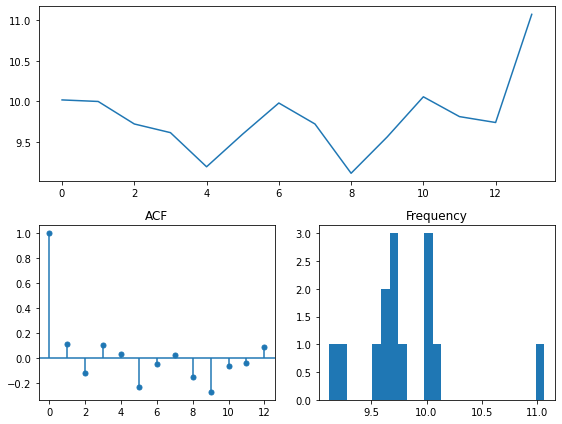

In [34]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [35]:
model = pmd.auto_arima(y, X=X, m=1, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=37.236, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32.844, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=34.619, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=34.357, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30.993, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=35.297, Time=0.91 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.048 seconds


/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([90.49078721])

### Athlete 1 Race 2

In [36]:
#Clearly this did not work as planned.

In [37]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_1/athlete_1_race_2_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


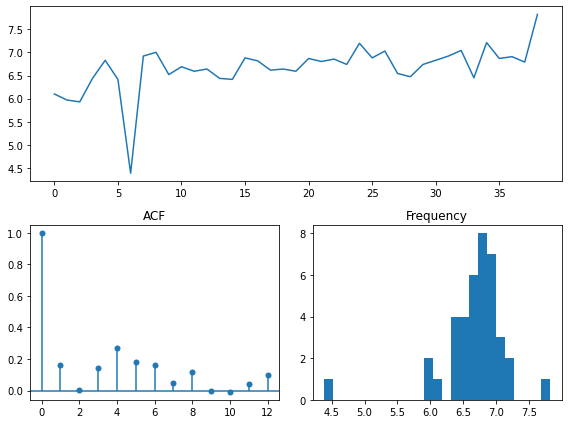

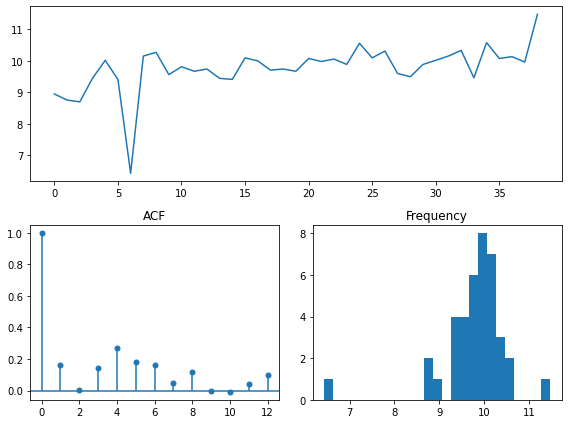

In [38]:
tsdisplay(race_df2['spd_mph'], lag_max=12)

tsdisplay(race_df2['GAP_ft_s'], lag_max=12)

X = race_df2[race_df2['is_race']==0][['distance', 'calories','elev_gain', 'elev_loss', 'avg_run_cadence']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [39]:
race_df2[race_df2['is_race']==1]['avg_run_cadence']

date
2019-06-02    172
Name: avg_run_cadence, dtype: int64

In [40]:
#Interesting, on race day the athlete ups their cadence compared to the average.

In [41]:
model = pmd.auto_arima(y, X=X, m=1, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'calories','elev_gain', 'elev_loss', 'avg_run_cadence']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=33.610, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19.451, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21.447, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21.616, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=76.271, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=23.513, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.433 seconds


/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([11.53305045])

The actual race data below:

In [42]:
race_df2[race_df2['is_race']==1][['spd_ft_s', 'distance', 'calories', 'elev_gain', 'elev_loss', 'avg_hr']]

,spd_ft_s,distance,calories,elev_gain,elev_loss,avg_hr
date,,,,,,
2019-06-02,11.478261,13.14,1766.0,354,604,0


In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                        SARIMAX   Log Likelihood                  -2.726
Date:                Wed, 03 Mar 2021   AIC                             19.451
Time:                        19:44:14   BIC                             30.914
Sample:                             0   HQIC                            23.530
                                 - 38                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.0076      0.900     -0.008      0.993      -1.771       1.756
distance           -0.0617      0.091     -0.682      0.495      -0.239       0.116
calories            0.0003      0.001      0.485      0.628      -0.001       0.001
elev_gain          -0.0022      0.002     -1.065      0.287      -0.006       0.002
elev_loss           0.0053      0.002      2.328      0.020       0.001       0.010
avg_run_cadence     0.0553      0.007      8.356      0.000       0.042       0.068
sigma2              0.0676      0.025      2.739      0.006       0.019       0.116
===================================================================================
Ljung-Box (Q):                       25.72   Jarque-Bera (JB):                31.13
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -1.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#I think this is too much bleed-in. The race cadence can be estimated, but we shouldn't use the
#actual race cadence to predict with.

In [46]:
#Looking at the cadence in training:
race_df2[(race_df2['is_race']==0) & (race_df2['distance']>10)]['avg_run_cadence'].mean()

167.0

In [47]:
#Looking at the average calories/mile on long runs:
(race_df2[(race_df2['is_race']==0) & (race_df2['distance']>10)]['calories']/race_df2[(race_df2['is_race']==0) & (race_df2['distance']>10)]['distance']).mean()

125.9140081664164

In [48]:
#so for a 13.1, we would expect: 1638 calories

In [49]:
model.predict(1, X = [[13.14, 1638, 354, 604, 167]])

/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([11.22421313])

In [50]:
#So what I am learning is, if we have a predicted heart rate or target heart rate, and a cadence,
#which we can pull from the training that is near the target race distance ( 10 miles for half,
#20 miles for marathon probably) we can get within about :15s/mile

## Athlete 2

### Race 5

In [51]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_2/athlete_2_race_5_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


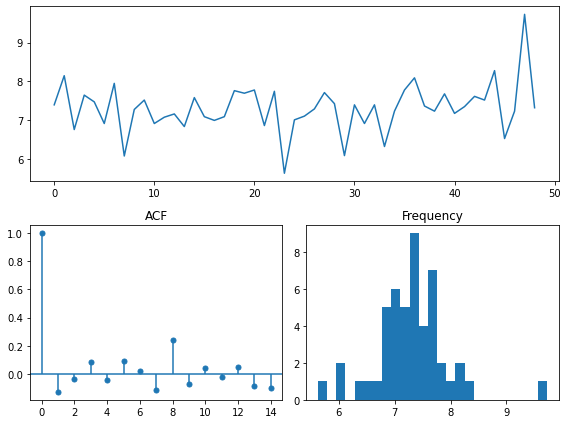

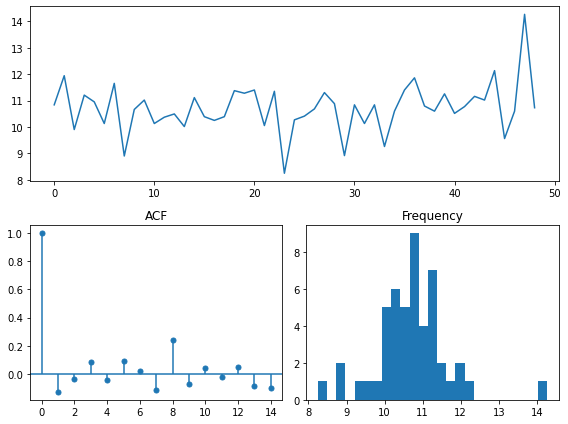

In [52]:
tsdisplay(race_df2['spd_mph'], lag_max=14)

tsdisplay(race_df2['GAP_ft_s'], lag_max=14)

X = race_df2[race_df2['race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['race']==0]['spd_ft_s']

In [53]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=122.615, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=114.690, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=116.201, Time=0.43 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=117.861, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=112.753, Time=0.13 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=114.900, Time=0.45 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=114.377, Time=0.24 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=117.616, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=115.931, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=115.684, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=114.946, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7]          
Total fit time: 3.070 seconds


/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([13.22835052])

In [54]:
race_df2[race_df2['race']==1][['spd_ft_s', 'distance', 'avg_hr','elev_gain', 'elev_loss']]

,spd_ft_s,distance,avg_hr,elev_gain,elev_loss
date,,,,,
2018-11-24,14.27027,3.09,176,49,49


In [55]:
#This athlete is a lot faster than their training lets on.

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                 -51.377
Date:                Wed, 03 Mar 2021   AIC                            112.753
Time:                        19:45:01   BIC                            122.109
Sample:                             0   HQIC                           116.289
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.1467      0.111      1.317      0.188      -0.072       0.365
avg_hr         0.0748      0.002     40.916      0.000       0.071       0.078
elev_gain     -0.0019      0.005     -0.356      0.722      -0.012       0.008
elev_loss     -0.0059      0.006     -0.963      0.335      -0.018       0.006
sigma2         0.4980      0.112      4.428      0.000       0.278       0.718
===================================================================================
Ljung-Box (Q):                       42.89   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.35   Prob(JB):                         0.41
Heteroskedasticity (H):               0.63   Skew:                            -0.47
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Athlete 10

### Race 0

In [57]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_10/athlete_10_race_0_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


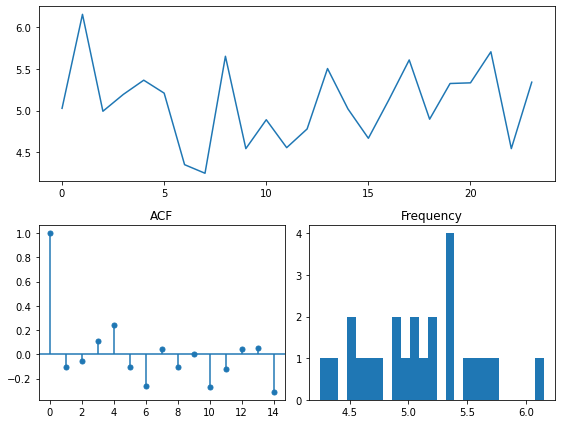

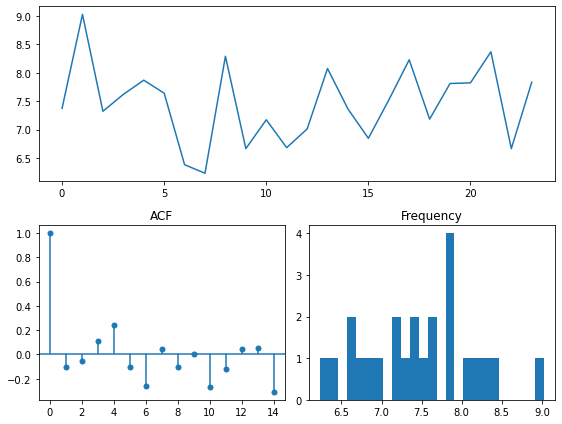

In [58]:
tsdisplay(race_df2['spd_mph'], lag_max=14)

tsdisplay(race_df2['GAP_ft_s'], lag_max=14)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [59]:
#Lets find the average cadence for long runs:
race_df2[race_df2['is_race']==0]['avg_run_cadence'].mean()

155.43478260869566

In [60]:
#And heart rate:
race_df2[race_df2['is_race']==0]['avg_hr'].mean()

150.8695652173913

In [61]:
race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

,distance,avg_hr,elev_gain,elev_loss,avg_run_cadence
date,,,,,
2018-10-27,13.09,171,594,896,159


In [62]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=27.155, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=31.058, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=20.625, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=19.775, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=29.067, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=17.774, Time=0.28 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=18.227, Time=0.33 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=21.773, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=20.023, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=18.370, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=19.647, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=21.981, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=16.188, Time=0.25 sec
 ARIMA(0,0,1)(1,0,0)[7]             : AIC=16.518, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=18.188, Time=0.27 s

/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([7.97779373])

In [63]:
race_df2[race_df2['is_race']==1][['spd_ft_s','distance', 'avg_hr','elev_gain', 'elev_loss']]

,spd_ft_s,distance,avg_hr,elev_gain,elev_loss
date,,,,,
2018-10-27,7.833828,13.09,171,594,896


In [64]:
preds2 = model.predict(1, X = [[13.1, 150, 594, 896, 159]])

/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [65]:
preds2

array([7.62558648])

:18s difference in their pace there.

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  -1.094
Date:                Wed, 03 Mar 2021   AIC                             16.188
Time:                        19:46:30   BIC                             24.136
Sample:                             0   HQIC                            18.187
                                 - 23                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
distance           -0.1462      0.141     -1.038      0.299      -0.422       0.130
avg_hr              0.0167      0.006      2.630      0.009       0.004       0.029
elev_gain       -7.614e-07      0.002     -0.000      1.000      -0.004       0.004
elev_loss           0.0016      0.002      0.952      0.341      -0.002       0.005
avg_run_cadence     0.0330      0.005      6.671      0.000       0.023       0.043
ma.L1              -0.6976      0.375     -1.862      0.063      -1.432       0.037
sigma2              0.0558      0.029      1.909      0.056      -0.001       0.113
===================================================================================
Ljung-Box (Q):                       58.57   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.00   Prob(JB):                         0.82
Heteroskedasticity (H):               0.49   Skew:                             0.30
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Race 1

In [67]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_10/athlete_10_race_1_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>
<class 'numpy.int64'>


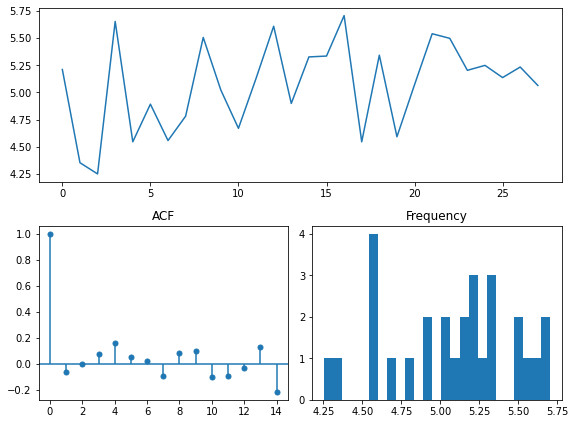

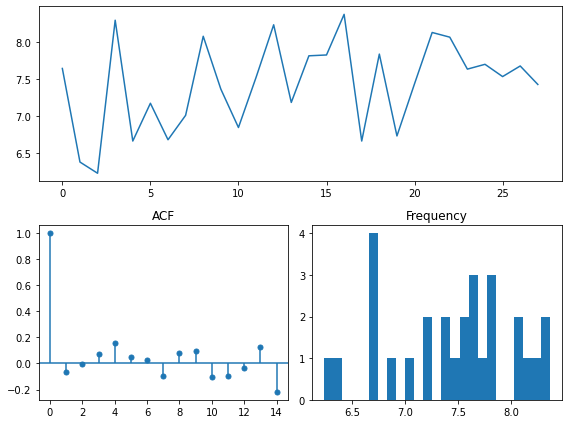

In [68]:
tsdisplay(race_df2['spd_mph'], lag_max=14)

tsdisplay(race_df2['GAP_ft_s'], lag_max=14)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

In [69]:
#Lets find the average cadence for long runs:
avg_cadence = race_df2[race_df2['is_race']==0]['avg_run_cadence'].mean()
avg_cadence

155.0

In [70]:
#And heart rate:
avg_hr = race_df2[race_df2['is_race']==0]['avg_hr'].mean()
avg_hr

149.15384615384616

In [71]:
race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

,distance,avg_hr,elev_gain,elev_loss,avg_run_cadence
date,,,,,
2018-10-27,13.09,171,594,896,159
2018-11-22,13.43,164,643,955,149


In [72]:
#Let's drop the first race, since it is contained in the data:
race_df2.drop('2018-10-27', axis = 0, inplace=True)
race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

,distance,avg_hr,elev_gain,elev_loss,avg_run_cadence
date,,,,,
2018-11-22,13.43,164,643,955,149


In [73]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X = race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']])#, 1.30, 240]])
preds

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=23.793, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=17.966, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=20.589, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=19.487, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=15.993, Time=0.14 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=19.879, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=19.966, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=22.164, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=18.607, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=17.501, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=23.014, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7]          
Total fit time: 3.130 seconds


/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([7.36311796])

In [74]:
race_df2[race_df2['is_race']==1][['spd_ft_s','distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

,spd_ft_s,distance,avg_hr,elev_gain,elev_loss,avg_run_cadence
date,,,,,,
2018-11-22,7.42616,13.43,164,643,955,149


In [75]:
preds2 = model.predict(1, X = [[13.43, 149, 643, 955, 155]])
preds2

/Users/Keith/miniconda/envs/pymc3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


array([7.25404742])

In [76]:
#Again, :20s/mile

## Race 2

In [2]:
#Let's read in a single csv first:
race_df2 = pd.read_csv('./data/races/athlete_10/athlete_10_race_3_3_mo_Running_extra_cols.csv', index_col='date')

try:
    race_df2['elev_gain'] = race_df2['elev_gain'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_gain'][0]))


try:
    race_df2['elev_loss'] = race_df2['elev_loss'].str.replace(',', '').astype(float)
except:
    print(type(race_df2['elev_loss'][0]))


try:
    race_df2['calories'] = race_df2['calories'].str.replace(',', '').astype(float)
except:
    print(race_df2['calories'].info())

<class 'numpy.int64'>


In [3]:
tsdisplay(race_df2['spd_mph'], lag_max=14)

tsdisplay(race_df2['GAP_ft_s'], lag_max=14)

X = race_df2[race_df2['is_race']==0][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']] #, 'avg_stride_length', 'avg_ground_contact_time']]

y = race_df2[race_df2['is_race']==0]['spd_ft_s']

NameError: name 'tsdisplay' is not defined

In [4]:
#Lets find the average cadence for long runs:
avg_cadence = race_df2[race_df2['is_race']==0]['avg_run_cadence'].mean()
avg_cadence

164.76

In [5]:
#And heart rate:
avg_hr = race_df2[race_df2['is_race']==0]['avg_hr'].mean()
avg_hr

155.68

In [6]:
race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

,distance,avg_hr,elev_gain,elev_loss,avg_run_cadence
date,,,,,
2019-03-03,13.25,164,1722,1549.0,163


In [132]:
# #Let's drop the first race, since it is contained in the data:
# race_df2.drop('2018-10-27', axis = 0, inplace=True)
# race_df2[race_df2['is_race']==1][['distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

In [7]:
race_distance = race_df2[race_df2['is_race']==1]['distance']
race_distance

date
2019-03-03    13.25
Name: distance, dtype: float64

In [8]:
race_gain = race_df2[race_df2['is_race']==1]['elev_gain']
race_loss = race_df2[race_df2['is_race']==1]['elev_loss']

In [9]:
model = pmd.auto_arima(y, X=X, m=7, trace=True)

preds = model.predict(1, X =[[race_distance, avg_hr, race_gain, race_loss, avg_cadence]])

NameError: name 'pmd' is not defined

In [119]:
race_df2[race_df2['is_race']==1][['spd_ft_s','distance', 'avg_hr','elev_gain', 'elev_loss', 'avg_run_cadence']]

,spd_ft_s,distance,avg_hr,elev_gain,elev_loss,avg_run_cadence
date,,,,,,
2018-11-22,7.42616,13.43,164,643,955,149


In [138]:
preds

array([7.16779698])

In [139]:
#Once again, within :15-20s of race pace